In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np

# custom colormap
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches

In [2]:
# for data collection
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import configparser

#set filepaths
project_root = os.path.abspath(os.getcwd())
root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
config_file =  os.path.join(root, "config.cfg")

# get Spotify api credentials
config = configparser.ConfigParser()
config.read(config_file)
CLIENT_ID = config["spotify"]["id"]
CLIENT_SECRET = config["spotify"]["secret"]

c:\Users\lisa.hornung\anaconda3\envs\py3_viz\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Load and clean data



### List of bike songs

#### Long list

Source: https://drive.google.com/file/d/15euF9Sz1qbj0Cnhty6tJSrDUwadhBD82/view?usp=share_link


Pdf converted to csv file using pdf_tables.com

In [3]:
raw = pd.read_csv("BikeSongs_06 2023.csv")

In [4]:
df_long = raw.copy()

# drop all empty rows
df_long = df_long.dropna(how='all').reset_index(drop=True)

# rename columns
new_column_names = {
    'Artist': 'Artist',
    'Title [language, genre, if not pop or rock]': 'Title_raw',
    'Source/Collection [Rereleased/Year]': 'Collection',
    'Origin Yr.': 'Year_raw',
    'Label [self or unknown]': 'Label'
}
df_long.rename(columns=new_column_names, inplace=True)

# clean title
df_long['Title'] = df_long['Title_raw'].str.split('[', expand=True)[0]
df_long['Title_info'] = df_long['Title_raw'].str.split('[', expand=True)[1]
df_long["Title"] = df_long["Title"].str.replace("\n", "")

# clean up year
replacement_mapping = {
    'c. ': '',
    'c.': '',
    'b. ':'',
    '\[unk.\]': None,
    "’s": '',
    '1927-2013': '2013',
    '1970, 2005': '2005'
}
df_long['Year'] = pd.to_numeric(df_long['Year_raw'].replace(replacement_mapping, regex=True), errors='coerce')

df_long

,Artist,Title_raw,Collection,Label,Year_raw,Title,Title_info,Year
0,- 17 different artists -,[23 songs about Tour de France],100th Tour de France [complilation],Puzzle Productions,2013,,23 songs about Tour de France],2013.0
1,- 17 different artists -,"[Texas bicycling culture, indie]",The Peek-a-Boo Bicycle Rodeo [comp.],Peek-a-Boo Records,1995,,"Texas bicycling culture, indie]",1995.0
2,- 19 different artists -,"[22 songs, no specific titles, glitch beats]",Bike Grooves [comp.],Olavbelgoe,2010,,"22 songs, no specific titles, glitch beats]",2010.0
3,- 24 different artists -,"[24 songs, Radio France]",Le Velo En Chansons [comp.],Harmonia Mundi,1995,,"24 songs, Radio France]",1995.0
4,- 26 different artists -,"[26 songs, Tour de France official collection]",Le Tour de France en Chansons [comp.],Lm Music,2012,,"26 songs, Tour de France official collection]",2012.0
...,...,...,...,...,...,...,...,...
2321,Zoey van Goey’s,We Don't Have That Kind of Bread,The Cage Was Unlocked All Along,Chemikal Underground,2009,We Don't Have That Kind of Bread,None,2009.0
2322,"Zonana, Saul",Fool on a bicycle,Guinea Pigs,BCI,2006,Fool on a bicycle,None,2006.0
2323,"Zucker, Laurel",Bicycling Uphill for Flute & Double Bass,Journeys,Cantilena Rec.,2011,Bicycling Uphill for Flute & Double Bass,None,2011.0
2324,"Zuckowski, Rolf","An meinem Fahrrad ist alles dran [juv.,\n“Ever...",Der Spielmann-Das Beste,MFD,1997,An meinem Fahrrad ist alles dran,"juv.,\n“Everything is to my bicycle”]",1997.0


In [30]:
df_long.to_csv("BikeSongs_06 2023_clean.csv", index=False)

### Short list

Wikipedia article: "https://en.wikipedia.org/wiki/List_of_songs_about_bicycles"

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_songs_about_bicycles'
df_raw = pd.read_html(url)[0]
df_raw["Title"] = df_raw["Title"].str.replace('"', '')
df_raw.to_csv("bikesongs_shortlist_raw.csv", index=False)

In [5]:
df = pd.read_csv("bikesongs_shortlist_with_id.csv")
df

,Title,Author,Year,Comments,spotify_track_id
0,The Acoustic Motorbike,Luka Bloom,1992,NaN,24hKXgJKxKTYmooGzFytX5
1,Amsterdam,Riblja Čorba,1986,From the album Osmi nervni slom,3yzPDhocvLw6A3HQo9eehb
2,An Elegy for Baby Blue,The Wonder Years (band),2008,"From ""Won't Be Pathetic Forever"" EP",6RMpR8v0WmlIhChhua2hso
3,Apology Song,The Decemberists,2001,From the 5 Songs EP,0jFKuwXlirLLPDDGeenm8G
4,A Bicicleta,Toquinho,1983,Album Casa de brinquedos.[4],3XwECXbBDGwERtTjHZFLu5
...,...,...,...,...,...
86,Two Wheels,Wax,2011,Scrublife,NaN
87,Yellow Bike,Pedro the Lion,2019,From the album Phoenix,1vztTdgyyARufM8lnCFEzE
88,Bicycle[34][35],RM,2021,Unofficial Release[36],NaN
89,Bicycle Wheels,Ugly Kid Joe,1996,NaN,29LebKCIqMPjNnCjeBknAc


In [7]:
df["spotify_track_id"].nunique()

67

### Get data from Spotify API

#### Authenticate

In [9]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

#### Get data for known ids

general info
- track: duration, popularity, external url
- album: release date, total tracks
- artist: genre, followers, popularity, image

audio features
- acousticness
- danceability
- energy
- instrumentalness
- liveness
- loudness
- mode
- speechiness
- tempo
- time_signature
- valence

In [20]:
# get tracks

# dict to hold data
tracks_dict = {"track_id":[], "url": [],  "track_popularity":[], "artist_id": [],
                "album_id":[], "album_release_date":[], "album_total_tracks":[]}

# list of tracks ids - need to split in 50
track_ids = df["spotify_track_id"].dropna().unique().tolist()
track_ids_split = [track_ids[0:50], track_ids[50:]]

# request data
for ids in track_ids_split:
    tracks_json = sp.tracks(ids)
    for i, tracks in enumerate(tracks_json["tracks"]):
        tracks_dict["track_id"].append(tracks_json["tracks"][i]["id"])
        tracks_dict["url"].append(tracks_json["tracks"][i]["external_urls"]["spotify"])
        tracks_dict["track_popularity"].append(tracks_json["tracks"][i]["popularity"])
        tracks_dict["artist_id"].append(tracks_json["tracks"][i]["artists"][0]["id"])
        tracks_dict["album_id"].append(tracks_json["tracks"][i]["album"]["id"])
        tracks_dict["album_release_date"].append(tracks_json["tracks"][i]["album"]["release_date"])
        tracks_dict["album_total_tracks"].append(tracks_json["tracks"][i]["album"]["total_tracks"])

# turn into dataframe
sp_tracks_df = pd.DataFrame(tracks_dict)
sp_tracks_df.head()

,track_id,url,track_popularity,artist_id,album_id,album_release_date,album_total_tracks
0,24hKXgJKxKTYmooGzFytX5,https://open.spotify.com/track/24hKXgJKxKTYmoo...,15,39E69agNUFWOZEzO24bjpo,24R2zV1ZUvrmoq5N4H61C7,1992-01-20,12
1,3yzPDhocvLw6A3HQo9eehb,https://open.spotify.com/track/3yzPDhocvLw6A3H...,30,7ET6Htzqtmr3w1tOoHLJAm,5xDfgISu0zanbkV12NCOdm,2021-01-13,1
2,6RMpR8v0WmlIhChhua2hso,https://open.spotify.com/track/6RMpR8v0WmlIhCh...,18,0nq64XZMWV1s7XHXIkdH7K,1aLWn5986dV6gSNecZkTSd,2013-02-12,18
3,0jFKuwXlirLLPDDGeenm8G,https://open.spotify.com/track/0jFKuwXlirLLPDD...,21,7ITd48RbLVpUfheE7B86o2,2qPl4FSwvJTF3gE4bOvlNk,2002,6
4,3XwECXbBDGwERtTjHZFLu5,https://open.spotify.com/track/3XwECXbBDGwERtT...,23,7rPqFVgJYARiFsLDlN6W6y,109Htk9P2cO3c7P5JSeYZQ,2010-09-11,15


In [43]:
# get artist data

# dict to hold data
artists_dict = {"artist_id":[], "artist_popularity":[], "artist_followers":[], "artist_genre":[], "artist_image_url":[], "artist_url": []}

# list of ids - need to split in 50
artist_ids = sp_tracks_df["artist_id"].tolist()
artist_ids_split = [artist_ids[:50], artist_ids[50:]]

# request data
for ids in artist_ids_split:
        artists_json = sp.artists(ids)
        for i, artists in enumerate(artists_json["artists"]):
                artists_dict["artist_id"].append(artists_json["artists"][i]["id"])
                artists_dict["artist_popularity"].append(artists_json["artists"][i]["popularity"])
                artists_dict["artist_followers"].append(artists_json["artists"][i]["followers"]["total"])
                artists_dict["artist_genre"].append(artists_json["artists"][i]["genres"])
                if len(artists_json["artists"][i]["images"])>0:
                        artists_dict["artist_image_url"].append(artists_json["artists"][i]["images"][0]["url"])
                else:
                        artists_dict["artist_image_url"].append(None)
                artists_dict["artist_url"].append(artists_json["artists"][i]["external_urls"]["spotify"])

# turn into dataframe
sp_artists_df = pd.DataFrame(artists_dict)
sp_artists_df.head()

,artist_id,artist_popularity,artist_followers,artist_genre,artist_image_url,artist_url
0,39E69agNUFWOZEzO24bjpo,30,19985,[irish singer-songwriter],https://i.scdn.co/image/ab6761610000e5eb0c2167...,https://open.spotify.com/artist/39E69agNUFWOZE...
1,7ET6Htzqtmr3w1tOoHLJAm,34,91337,[yugoslav rock],https://i.scdn.co/image/ab6772690000c46c0c2024...,https://open.spotify.com/artist/7ET6Htzqtmr3w1...
2,0nq64XZMWV1s7XHXIkdH7K,49,272537,"[alternative emo, anthem emo, emo, philly indi...",https://i.scdn.co/image/ab6761610000e5eb73c0ac...,https://open.spotify.com/artist/0nq64XZMWV1s7X...
3,7ITd48RbLVpUfheE7B86o2,53,606101,"[baroque pop, canadian indie, chamber pop, ind...",https://i.scdn.co/image/ab6761610000e5eb98bedc...,https://open.spotify.com/artist/7ITd48RbLVpUfh...
4,7rPqFVgJYARiFsLDlN6W6y,59,474774,"[bossa nova, mpb, samba, violao]",https://i.scdn.co/image/ab6761610000e5ebafcaf4...,https://open.spotify.com/artist/7rPqFVgJYARiFs...


In [33]:
# get tracks audio features

# list of tracks ids - need to split in 50
track_ids = df["spotify_track_id"].dropna().unique().tolist()
track_ids_split = [track_ids[0:50], track_ids[50:]]

# empty list to hold dataframes
sp_features_df = []

# get data
for ids in track_ids_split:
    features_json = sp.audio_features(tracks=ids)
    sp_features_df.append(pd.DataFrame(features_json))

sp_features_df = pd.concat(sp_features_df).drop(columns=["type", "uri", "track_href", "time_signature"])
sp_features_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,analysis_url,duration_ms
0,0.563,0.930,10,-10.513,0,0.0371,0.032400,0.029300,0.3160,0.863,118.102,24hKXgJKxKTYmooGzFytX5,https://api.spotify.com/v1/audio-analysis/24hK...,255400
1,0.695,0.682,9,-11.189,1,0.0483,0.191000,0.000000,0.1460,0.964,127.485,3yzPDhocvLw6A3HQo9eehb,https://api.spotify.com/v1/audio-analysis/3yzP...,220109
2,0.443,0.935,11,-4.168,1,0.0726,0.000692,0.000000,0.1410,0.504,108.933,6RMpR8v0WmlIhChhua2hso,https://api.spotify.com/v1/audio-analysis/6RMp...,145113
3,0.601,0.669,4,-10.024,1,0.0255,0.188000,0.000013,0.3440,0.652,104.952,0jFKuwXlirLLPDDGeenm8G,https://api.spotify.com/v1/audio-analysis/0jFK...,191787
4,0.860,0.281,8,-12.402,0,0.0489,0.919000,0.000088,0.0915,0.846,107.052,3XwECXbBDGwERtTjHZFLu5,https://api.spotify.com/v1/audio-analysis/3XwE...,144573


In [48]:
# merge dataframes
df = pd.merge(df, sp_tracks_df, left_on="spotify_track_id", right_on="track_id", how="left")
df = pd.merge(df,sp_artists_df, left_on="artist_id", right_on="artist_id", how="left" )
df = pd.merge(df, sp_features_df, left_on="track_id", right_on="id", how="left").drop(columns=[ 'track_id', 'id'])
df

,Title,Author,Year,Comments,spotify_track_id,url,track_popularity,artist_id,album_id,album_release_date,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,analysis_url,duration_ms
0,The Acoustic Motorbike,Luka Bloom,1992,NaN,24hKXgJKxKTYmooGzFytX5,https://open.spotify.com/track/24hKXgJKxKTYmoo...,15.0,39E69agNUFWOZEzO24bjpo,24R2zV1ZUvrmoq5N4H61C7,1992-01-20,...,-10.513,0.0,0.0371,0.032400,0.029300,0.3160,0.8630,118.102,https://api.spotify.com/v1/audio-analysis/24hK...,255400.0
1,Amsterdam,Riblja Čorba,1986,From the album Osmi nervni slom,3yzPDhocvLw6A3HQo9eehb,https://open.spotify.com/track/3yzPDhocvLw6A3H...,30.0,7ET6Htzqtmr3w1tOoHLJAm,5xDfgISu0zanbkV12NCOdm,2021-01-13,...,-11.189,1.0,0.0483,0.191000,0.000000,0.1460,0.9640,127.485,https://api.spotify.com/v1/audio-analysis/3yzP...,220109.0
2,An Elegy for Baby Blue,The Wonder Years (band),2008,"From ""Won't Be Pathetic Forever"" EP",6RMpR8v0WmlIhChhua2hso,https://open.spotify.com/track/6RMpR8v0WmlIhCh...,18.0,0nq64XZMWV1s7XHXIkdH7K,1aLWn5986dV6gSNecZkTSd,2013-02-12,...,-4.168,1.0,0.0726,0.000692,0.000000,0.1410,0.5040,108.933,https://api.spotify.com/v1/audio-analysis/6RMp...,145113.0
3,Apology Song,The Decemberists,2001,From the 5 Songs EP,0jFKuwXlirLLPDDGeenm8G,https://open.spotify.com/track/0jFKuwXlirLLPDD...,21.0,7ITd48RbLVpUfheE7B86o2,2qPl4FSwvJTF3gE4bOvlNk,2002,...,-10.024,1.0,0.0255,0.188000,0.000013,0.3440,0.6520,104.952,https://api.spotify.com/v1/audio-analysis/0jFK...,191787.0
4,A Bicicleta,Toquinho,1983,Album Casa de brinquedos.[4],3XwECXbBDGwERtTjHZFLu5,https://open.spotify.com/track/3XwECXbBDGwERtT...,23.0,7rPqFVgJYARiFsLDlN6W6y,109Htk9P2cO3c7P5JSeYZQ,2010-09-11,...,-12.402,0.0,0.0489,0.919000,0.000088,0.0915,0.8460,107.052,https://api.spotify.com/v1/audio-analysis/3XwE...,144573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Two Wheels,Wax,2011,Scrublife,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Yellow Bike,Pedro the Lion,2019,From the album Phoenix,1vztTdgyyARufM8lnCFEzE,https://open.spotify.com/track/1vztTdgyyARufM8...,26.0,4ApdWjZjftqD77Vh6qDbCr,6GmQc3dPo8YcwbC9zOrWv9,2019-01-18,...,-7.556,1.0,0.0571,0.191000,0.154000,0.1050,0.6860,119.439,https://api.spotify.com/v1/audio-analysis/1vzt...,233718.0
94,Bicycle[34][35],RM,2021,Unofficial Release[36],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Bicycle Wheels,Ugly Kid Joe,1996,NaN,29LebKCIqMPjNnCjeBknAc,https://open.spotify.com/track/29LebKCIqMPjNnC...,18.0,3XsgWn63EnA4wYZBjVyxjf,35jT7xx73FcYxeBjCoBaFD,1996,...,-9.906,1.0,0.0895,0.003000,0.008260,0.0796,0.9320,146.119,https://api.spotify.com/v1/audio-analysis/29Le...,119840.0


In [6]:
# get artist main genres
df["genre_rock"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'rock' in x.lower() else 0)
df["genre_pop"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'pop' in x.lower() else 0)
df["genre_hiphop"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'hip hop' in x.lower() else 0)
df["genre_punk"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'punk' in x.lower() else 0)
df["genre_funk"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'funk' in x.lower() else 0)
df["genre_indie"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'indie' in x.lower() else 0)
df["genre_metal"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'metal' in x.lower() else 0)
df["genre_electro"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'electro' in x.lower() else 0)
df["genre_ska"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'ska' in x.lower() else 0)
df["genre_songwriter"] = df['artist_genre'].fillna("").apply(lambda x: 1 if 'songwriter' in x.lower() else 0)

# convert genre to list
#df["artist_genre"] = df["artist_genre"].str.strip('[]').str.split(',')
#genre_dummies = df["artist_genre"].str.join(',').str.get_dummies(sep=',')
#genre_dummies.sum().sort_values().tail(30)

In [10]:
df.to_csv("bikesongs_shortlist_with_spotify_data_clean.csv", index=False)

# Visualise

In [3]:
# get cleaned spotity dataset
df = pd.read_csv("bikesongs_shortlist_with_spotify_data_clean.csv")
df_long = pd.read_csv("BikeSongs_06 2023_clean.csv")

In [4]:
clrs = {"turquoise": "#5ac8c8", "light-grey": "#e8e8e8", "pink": "#be64ac", "dark-blue": "#3b4994"}

In [5]:
df_filter = df[~df["spotify_track_id"].isna()]

# create bivariate colors for scatter plot
df_filter.loc[(df_filter["valence"]>=0.5) & (df_filter["energy"]>=0.5), "scatter_clr"] = clrs["dark-blue"]
df_filter.loc[(df_filter["valence"]>=0.5) & (df_filter["energy"]<0.5), "scatter_clr"] = clrs["turquoise"]
df_filter.loc[(df_filter["valence"]<0.5) & (df_filter["energy"]<0.5), "scatter_clr"] = clrs["light-grey"]
df_filter.loc[(df_filter["valence"]<0.5) & (df_filter["energy"]>=0.5), "scatter_clr"] = clrs["pink"]

C:\Users\LISA~1.HOR\AppData\Local\Temp/ipykernel_15548/2055354629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.loc[(df_filter["valence"]>=0.5) & (df_filter["energy"]>=0.5), "scatter_clr"] = clrs["dark-blue"]


In [6]:
timeseries = df_long[df_long["Year"]>=1950]
timeseries= timeseries.groupby("Year")["Title"].count().reset_index()
helper = pd.DataFrame()
helper["Year"] = np.arange(1950,2023,1)
timeseries = pd.merge(helper, timeseries, how="outer", on="Year").fillna(0)
timeseries.head()

,Year,Title
0,1950.0,6.0
1,1951.0,2.0
2,1952.0,2.0
3,1953.0,0.0
4,1954.0,0.0


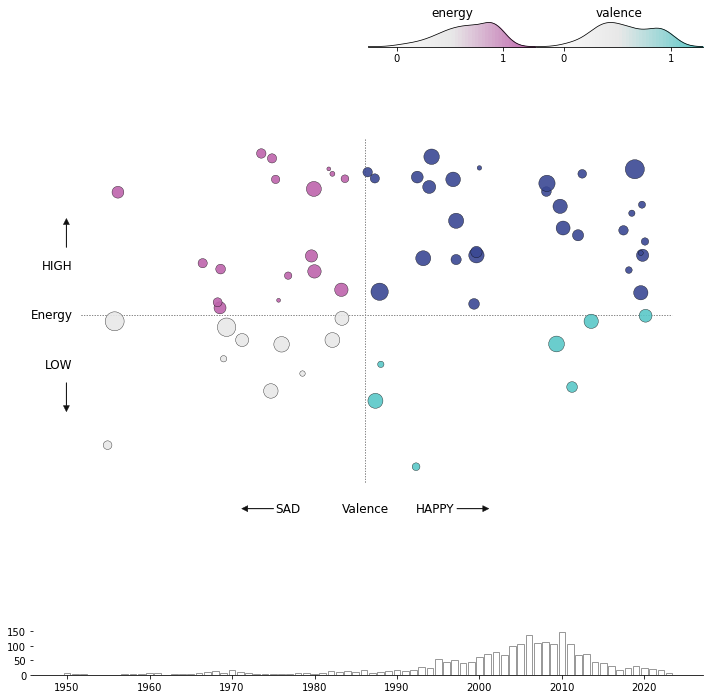

In [14]:
# create objects
rows=14
fig = plt.figure(figsize=(12,12))
gs = GridSpec(rows, 4, figure=fig)
#fig.set_facecolor("#f9f9f9")

# create grid
ax1 = fig.add_subplot(gs[0:1, 2:3])
ax2 = fig.add_subplot(gs[0:1, 3:4])
#ax3 = fig.add_subplot(gs[0:1, 2:3])
ax4 = fig.add_subplot(gs[2:rows-3, 0:4])
ax5 = fig.add_subplot(gs[rows-2:, 0:4])
plt.subplots_adjust(hspace=1, wspace=0)
axes = [ax1, ax2, ax4, ax5]

# format axes
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        #ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
#format_axes(fig)

# add density plots ----------------------------------------
kde_columns = ["energy","valence",  ] 
clr_maps = [cm_energy, cm_valence,   cm_danceability]
for i, column in enumerate(kde_columns):
    plot_density_custom_cm(df_filter, column, clr_maps[i], axes[i])
    #sns.kdeplot(df_filter[column], fill=True, alpha=1, ax=axes[i], cut=3, color=fill_clr[i], edgecolor="black" )
    axes[i].set_title(column)

for ax in [ax1, ax2]:
    for pos in ["top", "left", "right"]:
        ax.spines[pos].set_visible(False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([0,1])
    
# scatterplot - are bike songs happy songs? ---------------------
sns.scatterplot(data=df_filter, y=df_filter["energy"],  x=df_filter["valence"], ax=ax4, edgecolor="black",
                 c=df_filter["scatter_clr"], alpha=0.9, zorder=3,
                    s=[i*5 for i in df_filter["track_popularity"]],
                    )
ax4.axis("off")
xmin, xmax= ax4.get_xlim()
ymin, ymax= ax4.get_ylim()

# axis labels
ax4.text(x=0.35, y=ymin-0.08,s="Sad".upper(), ha="left", va="center", fontsize=12)
ax4.text(x=0.65, y=ymin-0.08,s="Happy".upper(), ha="right", va="center", fontsize=12)
ax4.text(x=0.5, y=ymin-0.08,s="Valence", ha="center", va="center", fontsize=12)
ax4.text(x=0+0.01, y=0.5,s="Energy", ha="right", va="center", fontsize=12)
ax4.text(x=0+0.01, y=0.65,s="High".upper(), ha="right", va="center", fontsize=12)
ax4.text(x=0+0.01, y=0.35,s="Low".upper(), ha="right", va="center", fontsize=12)

# add arrows
arr_style = "Simple, tail_width=0.5, head_width=6, head_length=6"
kw = dict(arrowstyle=arr_style, color="#111111",linewidth=0.5,connectionstyle="arc3,rad=0", clip_on=False)
a1 = patches.FancyArrowPatch((0, 0.7), (0, 0.8),**kw)
a2 = patches.FancyArrowPatch((0, 0.3), (0, 0.2), **kw)
a3 = patches.FancyArrowPatch((0.65, ymin-0.08), (0.71, ymin-0.08), **kw)
a4 = patches.FancyArrowPatch((0.35,  ymin-0.08), (0.29,  ymin-0.08), **kw)
for a in [a1,a2, a3, a4]:
    ax4.add_patch(a)

# gridlines
ax4.hlines(y=[0.5,0.5], xmin= xmin, xmax =xmax, linewidth=1, linestyle="dotted",
           color='#888888', alpha=1, zorder=2)
ax4.vlines(x=[0.5,0.5], ymin= ymin, ymax = ymax,  linewidth=1,  linestyle="dotted",
           color='#888888', alpha=1, zorder=2)

# timeseries bar chart -------------------------------------
ax5.bar(timeseries["Year"], timeseries["Title"], color="None", edgecolor="#999999", lw=1)
ax5.set_ylim(0,250)
ax5.set_yticks([0,50,100,150])
for pos in ["top", "left", "right"]:
    ax5.spines[pos].set_visible(False)

plt.show()

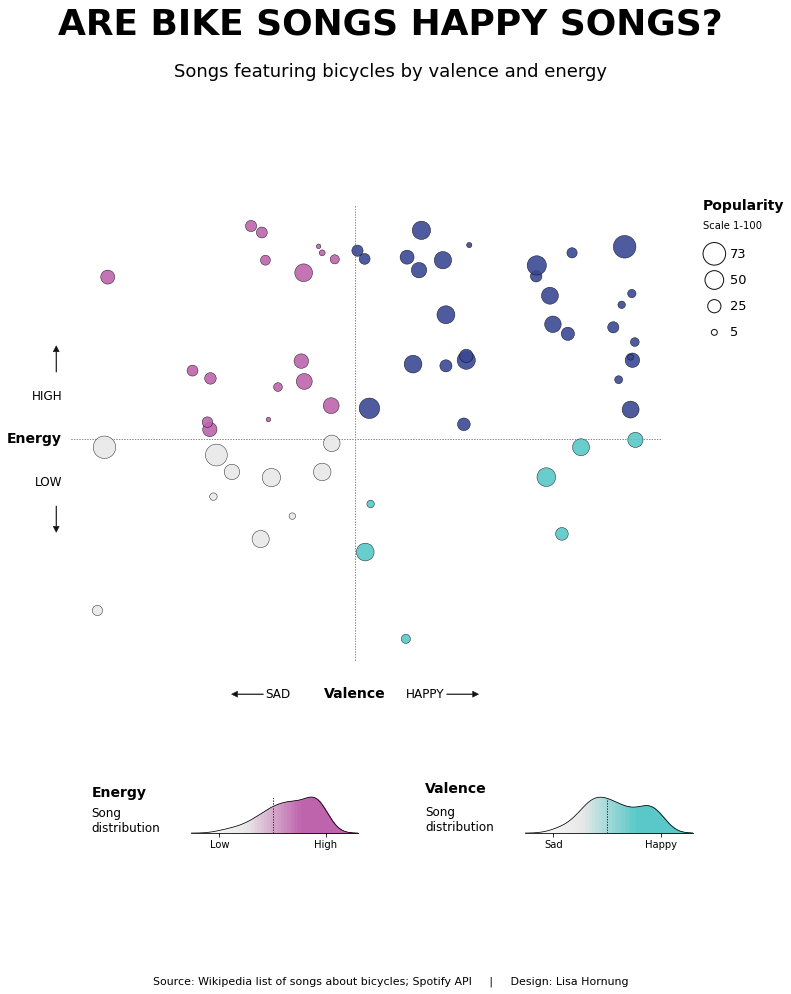

In [140]:
# create figure ---------------------------------
rows=12
fig = plt.figure(figsize=(12,12))
gs = GridSpec(rows, 4, figure=fig)
ax1 = fig.add_subplot(gs[rows-1, 1:2])
ax2 = fig.add_subplot(gs[rows-1, 3:4])
ax3 = fig.add_subplot(gs[0:rows-2, 0:4])
plt.subplots_adjust(hspace=0.5, wspace=0)
axes = [ax1, ax2, ax3]

fig.set_facecolor("#ffffff")

# add density plots ----------------------------------------
kde_columns = ["Energy","Valence"] 
clr_maps = [cm_energy, cm_valence]
for i, column in enumerate(kde_columns):
    plot_density_custom_cm(df_filter, column.lower(), clr_maps[i], axes[i])
    axes[i].text(-1.2,1.5, column, fontsize=14, fontweight="bold")
    axes[i].text(-1.2,0.5, "Song\ndistribution", fontsize=12, fontweight="regular", va="center")

# format axes
for ax in [ax1, ax2]:
    for pos in ["top", "left", "right"]:
        ax.spines[pos].set_visible(False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([0,1])
    ax.vlines(x=[0.5,0.5], ymin=ax.get_ylim()[0], ymax =ax.get_ylim()[1], linewidth=1, linestyle="dotted",
           color='#333333', alpha=1, zorder=2) 
    ax.set_ylim(0, ax.get_ylim()[1]+0.05)
ax1.set_xticklabels(["Low", "High"])
ax2.set_xticklabels(["Sad", "Happy"])


# scatterplot - are bike songs happy songs? ---------------------
scale_factor=7
sns.scatterplot(data=df_filter, y=df_filter["energy"],  x=df_filter["valence"], ax=ax3, edgecolor="black",
                 c=df_filter["scatter_clr"], alpha=0.9, zorder=3,
                    s=[i*scale_factor for i in df_filter["track_popularity"]],
                   # s=100
            )
                    
ax3.axis("off")
xmin, xmax= ax3.get_xlim()
ymin, ymax= ax3.get_ylim()

# custom legend
lg = fig.add_axes([0.9,0.7,0.05,0.1])
lg.scatter(x=[0,0,0,0], y=[0,1,2,3], s=[5*scale_factor, 25*scale_factor, 50*scale_factor, max(df_filter["track_popularity"])*scale_factor], 
           clip_on=False, color="None", edgecolor="#111111", lw=1)
lg.text(-0.03,4.7, "Popularity", ha="left", fontsize=14, fontweight="bold")
lg.text(-0.03,3.95, "Scale 1-100", ha="left", fontsize=10, fontweight="regular")
lg.text(0.04,3, int(max(df_filter["track_popularity"])), ha="left", fontsize=13, va="center")
lg.text(0.04,2, "50", ha="left", fontsize=13, va="center")
lg.text(0.04,1, "25", ha="left", fontsize=13, va="center")
lg.text(0.04,0, "5", ha="left", fontsize=13, va="center")
lg.axis("off")

# axis labels
ax3.text(x=0.35, y=ymin-0.08,s="Sad".upper(), ha="left", va="center", fontsize=12)
ax3.text(x=0.65, y=ymin-0.08,s="Happy".upper(), ha="right", va="center", fontsize=12)
ax3.text(x=0.5, y=ymin-0.08,s="Valence", ha="center", va="center", fontsize=14, fontweight="bold")
ax3.text(x=0+0.01, y=0.5,s="Energy", ha="right", va="center", fontsize=14, fontweight="bold")
ax3.text(x=0+0.01, y=0.6,s="High".upper(), ha="right", va="center", fontsize=12)
ax3.text(x=0+0.01, y=0.4,s="Low".upper(), ha="right", va="center", fontsize=12)

# add arrows
arr_style = "Simple, tail_width=0.5, head_width=6, head_length=6"
kw = dict(arrowstyle=arr_style, color="#111111",linewidth=0.5,connectionstyle="arc3,rad=0", clip_on=False)
a1 = patches.FancyArrowPatch((0, 0.65), (0, 0.72),**kw)
a2 = patches.FancyArrowPatch((0, 0.35), (0, 0.28), **kw)
a3 = patches.FancyArrowPatch((0.65, ymin-0.08), (0.71, ymin-0.08), **kw)
a4 = patches.FancyArrowPatch((0.35,  ymin-0.08), (0.29,  ymin-0.08), **kw)
for a in [a1,a2, a3, a4]:
    ax3.add_patch(a)

# gridlines
ax3.hlines(y=[0.5,0.5], xmin= xmin, xmax =xmax, linewidth=1, linestyle="dotted",
           color='#888888', alpha=1, zorder=2)
ax3.vlines(x=[0.5,0.5], ymin= ymin, ymax = ymax,  linewidth=1,  linestyle="dotted",
           color='#888888', alpha=1, zorder=2)


# Title and annotations -----------------------------------------------
fig.text(0.55,1.05, "Are bike songs happy songs?".upper(), fontsize=36, fontweight="bold", ha="center")
fig.text(0.55,1, "Songs featuring bicycles by valence and energy", fontsize=18, ha="center")
fig.text(0.55,-0.05, "Source: Wikipedia list of songs about bicycles; Spotify API     |     Design: Lisa Hornung", fontsize=11, ha="center")

plt.savefig("bicycle-songs-scatter.png", bbox_inches='tight', transparent=False, pad_inches=1.6)


plt.show()

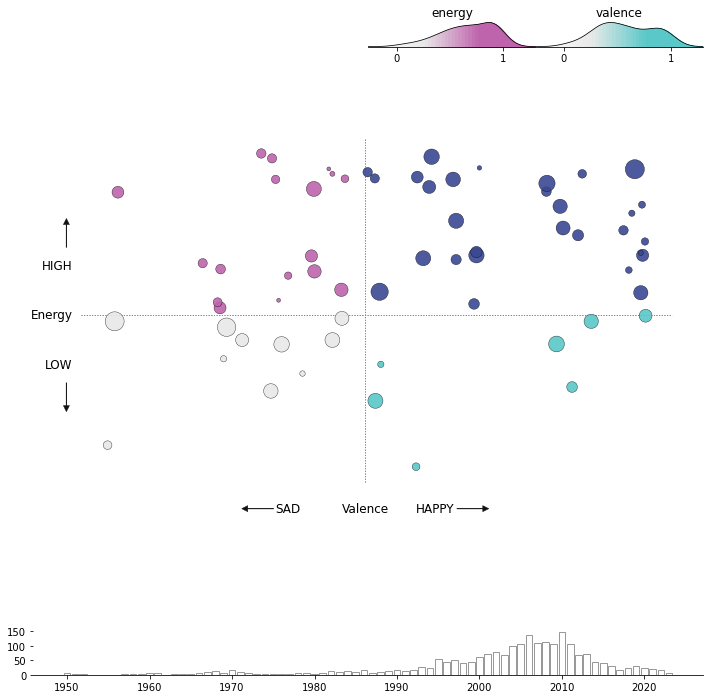

In [110]:
# create objects
rows=14
fig = plt.figure(figsize=(12,12))
gs = GridSpec(rows, 4, figure=fig)
#fig.set_facecolor("#f9f9f9")

# create grid
ax1 = fig.add_subplot(gs[0:1, 2:3])
ax2 = fig.add_subplot(gs[0:1, 3:4])
#ax3 = fig.add_subplot(gs[0:1, 2:3])
ax4 = fig.add_subplot(gs[2:rows-3, 0:4])
ax5 = fig.add_subplot(gs[rows-2:, 0:4])
plt.subplots_adjust(hspace=1, wspace=0)
axes = [ax1, ax2, ax4, ax5]

# format axes
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        #ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
#format_axes(fig)

# add density plots ----------------------------------------
kde_columns = ["energy","valence",  ] 
clr_maps = [cm_energy, cm_valence,   cm_danceability]
for i, column in enumerate(kde_columns):
    plot_density_custom_cm(df_filter, column, clr_maps[i], axes[i])
    #sns.kdeplot(df_filter[column], fill=True, alpha=1, ax=axes[i], cut=3, color=fill_clr[i], edgecolor="black" )
    axes[i].set_title(column)

for ax in [ax1, ax2]:
    for pos in ["top", "left", "right"]:
        ax.spines[pos].set_visible(False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_yticks([])
    ax.set_xticks([0,1])
    
# scatterplot - are bike songs happy songs? ---------------------
sns.scatterplot(data=df_filter, y=df_filter["energy"],  x=df_filter["valence"], ax=ax4, edgecolor="black",
                 c=df_filter["scatter_clr"], alpha=0.9, zorder=3,
                    s=[i*5 for i in df_filter["track_popularity"]],
                    )
ax4.axis("off")
xmin, xmax= ax4.get_xlim()
ymin, ymax= ax4.get_ylim()

# axis labels
ax4.text(x=0.35, y=ymin-0.08,s="Sad".upper(), ha="left", va="center", fontsize=12)
ax4.text(x=0.65, y=ymin-0.08,s="Happy".upper(), ha="right", va="center", fontsize=12)
ax4.text(x=0.5, y=ymin-0.08,s="Valence", ha="center", va="center", fontsize=12)
ax4.text(x=0+0.01, y=0.5,s="Energy", ha="right", va="center", fontsize=12)
ax4.text(x=0+0.01, y=0.65,s="High".upper(), ha="right", va="center", fontsize=12)
ax4.text(x=0+0.01, y=0.35,s="Low".upper(), ha="right", va="center", fontsize=12)

# add arrows
arr_style = "Simple, tail_width=0.5, head_width=6, head_length=6"
kw = dict(arrowstyle=arr_style, color="#111111",linewidth=0.5,connectionstyle="arc3,rad=0", clip_on=False)
a1 = patches.FancyArrowPatch((0, 0.7), (0, 0.8),**kw)
a2 = patches.FancyArrowPatch((0, 0.3), (0, 0.2), **kw)
a3 = patches.FancyArrowPatch((0.65, ymin-0.08), (0.71, ymin-0.08), **kw)
a4 = patches.FancyArrowPatch((0.35,  ymin-0.08), (0.29,  ymin-0.08), **kw)
for a in [a1,a2, a3, a4]:
    ax4.add_patch(a)

# gridlines
ax4.hlines(y=[0.5,0.5], xmin= xmin, xmax =xmax, linewidth=1, linestyle="dotted",
           color='#888888', alpha=1, zorder=2)
ax4.vlines(x=[0.5,0.5], ymin= ymin, ymax = ymax,  linewidth=1,  linestyle="dotted",
           color='#888888', alpha=1, zorder=2)

# timeseries bar chart -------------------------------------
ax5.bar(timeseries["Year"], timeseries["Title"], color="None", edgecolor="#999999", lw=1)
ax5.set_ylim(0,250)
ax5.set_yticks([0,50,100,150])
for pos in ["top", "left", "right"]:
    ax5.spines[pos].set_visible(False)

plt.show()

In [8]:
# create custom colormap from a list of hex codes
def colormap_from_hex(name, list_hexcolors, n_bins):
    color_list = [colors.hex2color(i) for i in list_hexcolors]
    cm = LinearSegmentedColormap.from_list(name, color_list, N=n_bins)
    return cm

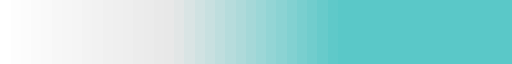

In [37]:
cm_valence = colormap_from_hex("valence", ["#ffffff", clrs["light-grey"],clrs["turquoise"], clrs["turquoise"]], 50)
cm_energy = colormap_from_hex("energy", ["#ffffff", clrs["light-grey"],clrs["pink"], clrs["pink"]], 50)
cm_danceability = colormap_from_hex("danceability", [clrs["light-grey"], clrs["light-grey"],"#888888"], 50)
cm_valence

In [10]:
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np

def plot_density_custom_cm(dataframe, column, colormap, ax):
    # create the kde model
    kde = gaussian_kde(dataframe[column])

    g = sns.kdeplot(data=dataframe[column], ax=ax, c='k', linewidth=0.75)
    
    # remove margins; optional
    g.margins(x=0, y=0)
    
    # get the min and max of the x-axis
    xmin, xmax = g.get_xlim()

    # create points between the min and max
    x = np.linspace(xmin, xmax, 1000)

    # calculate the y values from the model
    kde_y = kde(x)

    # use custom colormap 
    norm = plt.Normalize(0, 1)
    z = np.linspace(0, 1, 1000)
    for i in range(len(x)-1):
        ax.fill_between(x[i:i + 2], kde_y[i:i + 2], color=colormap(norm(z[i])))

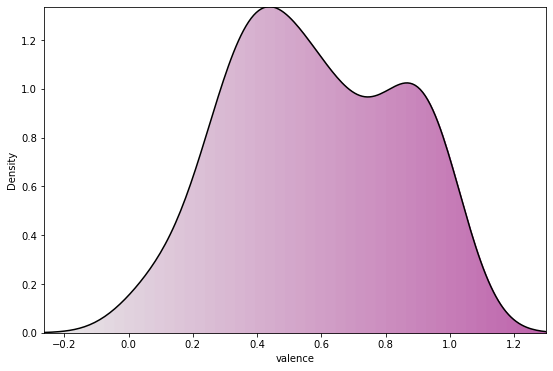

In [32]:
# plot
fig, ax = plt.subplots(figsize=(9, 6))

plot_density_custom_cm(df_filter, "valence", cm_valence, ax)

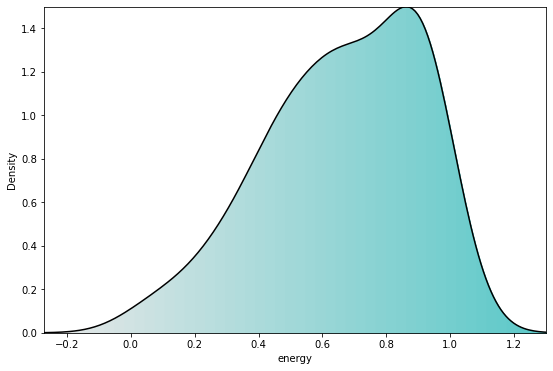

In [28]:
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.integrate import simps
import numpy as np


# plot
fig, ax = plt.subplots(figsize=(9, 6))


def plot_density_custom_cm(dataframe, column, colormap, ax):
    # create the kde model
    kde = gaussian_kde(dataframe[column])

    g = sns.kdeplot(data=dataframe[column], ax=ax, c='k')
    
    # remove margins; optional
    g.margins(x=0, y=0)
    
    # get the min and max of the x-axis
    xmin, xmax = g.get_xlim()

    # create points between the min and max
    x = np.linspace(xmin, xmax, 1000)

    # calculate the y values from the model
    kde_y = kde(x)

    # use custom colormap 
    norm = plt.Normalize(0, 1)
    z = np.linspace(0, 1, 1000)
    for i in range(len(x)-1):
        ax.fill_between(x[i:i + 2], kde_y[i:i + 2], color=colormap(norm(z[i])))


# create the kde model
kde = gaussian_kde(df_filter["energy"])

g = sns.kdeplot(data=df_filter["energy"], ax=ax, c='k')

# remove margins; optional
g.margins(x=0, y=0)

# get the min and max of the x-axis
xmin, xmax = g.get_xlim()

# create points between the min and max
x = np.linspace(xmin, xmax, 1000)

# calculate the y values from the model
kde_y = kde(x)

# use custom colormap 
norm = plt.Normalize(0, 1)
z = np.linspace(0, 1, 1000)
for i in range(len(x)-1):
    ax.fill_between(x[i:i + 2], kde_y[i:i + 2], color=cm_energy(norm(z[i])))

# Python learnings

### Fill between with gradients
https://blog.finxter.com/how-to-fill-rainbow-color-under-a-curve-in-python-matplotlib/

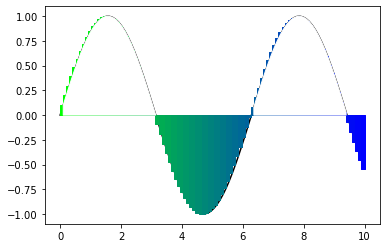

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
x = np.linspace(0, 10, 100)
y = np.sin(x)
fig, ax = plt.subplots()
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
colors = [(0, 1, 0), (0, 0, 1)]  # R -> G -> B
n_bins = 50  # Increase this for smoother color transitions
cm = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)
z = np.linspace(0, 1, len(x))
ax.plot(x, y, color='black')
ax.fill_between(x, 0, y, color='white', where=y > 0, zorder=3)
for i in range(1, len(x)):
    ax.fill_between(x[i-1:i+1], y[i-1:i+1], color=cm(z[i-1]), step='pre', zorder=2)
plt.show()

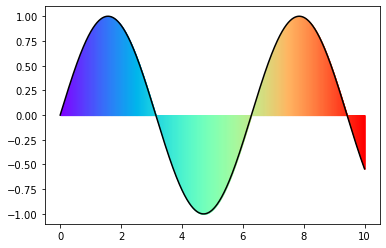

In [89]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.linspace(0, 1, 1000)
norm = plt.Normalize(0, 1)
cmap = plt.get_cmap('rainbow')
fig, ax = plt.subplots()
ax.plot(x, y, color='k')
ax.fill_between(x, y, color='white', where=y >= min(y))
for i in range(len(x)-1):
    ax.fill_between(x[i:i + 2], y[i:i + 2], color=cmap(norm(z[i])))
plt.show()

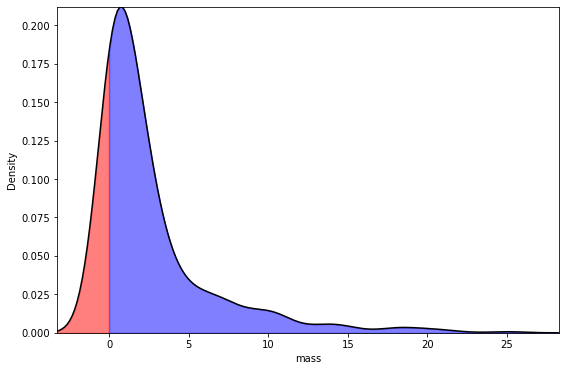

In [175]:
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.integrate import simps
import numpy as np

# load sample data
df = sns.load_dataset('planets')

# create the kde model
kde = gaussian_kde(df.mass.dropna())

# plot
fig, ax = plt.subplots(figsize=(9, 6))
g = sns.kdeplot(data=df.mass, ax=ax, c='k')

# remove margins; optional
g.margins(x=0, y=0)

# get the min and max of the x-axis
xmin, xmax = g.get_xlim()

# create points between the min and max
x = np.linspace(xmin, xmax, 1000)

# calculate the y values from the model
kde_y = kde(x)


# select x values below 0
x0 = x[x < 0]

# get the len, which will be used for slicing the other arrays
x0_len = len(x0)

# slice the arrays
y0 = kde_y[:x0_len]
x1 = x[x0_len:]
y1 = kde_y[x0_len:]

# calculate the area under the curves
area0 = np.round(simps(y0, x0, dx=1) * 100, 0)
area1 = np.round(simps(y1, x1, dx=1) * 100, 0)

# fill the areas
g.fill_between(x=x0, y1=y0, color='r', alpha=.5)
g.fill_between(x=x1, y1=y1, color='b', alpha=.5)

In [ ]:
# create bivariate colors for scatter plot
df_filter.loc[(df_filter["valence"]>=0.5) & (df_filter["energy"]>=0.5), "scatter_clr"] = "#3b4994"
df_filter.loc[(df_filter["valence"]>=0.5) & (df_filter["energy"]<0.5), "scatter_clr"] = "#5ac8c8"
df_filter.loc[(df_filter["valence"]<0.5) & (df_filter["energy"]<0.5), "scatter_clr"] = "#e8e8e8"
df_filter.loc[(df_filter["valence"]<0.5) & (df_filter["energy"]>=0.5), "scatter_clr"] = "#be64ac"

In [200]:
# custom colormap
import matplotlib.colors as colors

n_bins = 50  # Increase this for smoother color transitions

custom_colors = [colors.hex2color('#e8e8e8') , colors.hex2color('#be64ac')]

cm_energy = LinearSegmentedColormap.from_list('energy', custom_colors, N=n_bins)

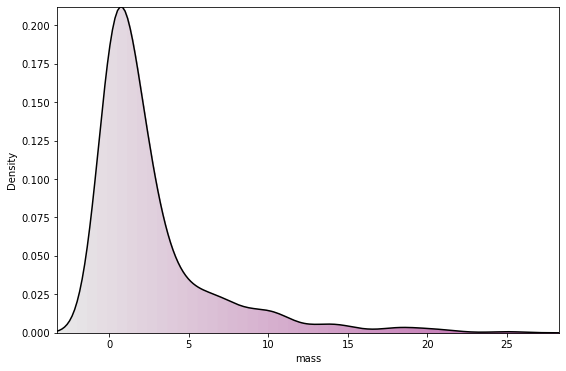

In [201]:

# load sample data
df = sns.load_dataset('planets')

# create the kde model
kde = gaussian_kde(df.mass.dropna())

# plot
fig, ax = plt.subplots(figsize=(9, 6))
g = sns.kdeplot(data=df.mass, ax=ax, c='k')

# remove margins; optional
g.margins(x=0, y=0)

# get the min and max of the x-axis
xmin, xmax = g.get_xlim()

# create points between the min and max
x = np.linspace(xmin, xmax, 1000)

# calculate the y values from the model
kde_y = kde(x)

# define colormap 
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0, 1)
z = np.linspace(0, 1, 1000)

for i in range(len(x)-1):
    ax.fill_between(x[i:i + 2], kde_y[i:i + 2], color=cm(norm(z[i])))
    
plt.show()

# Explore data

### Shortlist

In [31]:
# get cleaned datasets
df = pd.read_csv("bikesongs_shortlist_with_spotify_data_clean.csv")

In [17]:
df.head()

,Title,Author,Year,Comments,spotify_track_id,url,track_popularity,artist_id,album_id,album_release_date,...,genre_rock,genre_pop,genre_hiphop,genre_punk,genre_funk,genre_indie,genre_metal,genre_electro,genre_ska,genre_songwriter
0,The Acoustic Motorbike,Luka Bloom,1992,NaN,24hKXgJKxKTYmooGzFytX5,https://open.spotify.com/track/24hKXgJKxKTYmoo...,15.0,39E69agNUFWOZEzO24bjpo,24R2zV1ZUvrmoq5N4H61C7,20/01/1992,...,0,0,0,0,0,0,0,0,0,1
1,Amsterdam,Riblja Čorba,1986,From the album Osmi nervni slom,3yzPDhocvLw6A3HQo9eehb,https://open.spotify.com/track/3yzPDhocvLw6A3H...,30.0,7ET6Htzqtmr3w1tOoHLJAm,5xDfgISu0zanbkV12NCOdm,13/01/2021,...,1,0,0,0,0,0,0,0,0,0
2,An Elegy for Baby Blue,The Wonder Years (band),2008,"From ""Won't Be Pathetic Forever"" EP",6RMpR8v0WmlIhChhua2hso,https://open.spotify.com/track/6RMpR8v0WmlIhCh...,18.0,0nq64XZMWV1s7XHXIkdH7K,1aLWn5986dV6gSNecZkTSd,12/02/2013,...,0,1,0,1,0,1,0,0,0,0
3,Apology Song,The Decemberists,2001,From the 5 Songs EP,0jFKuwXlirLLPDDGeenm8G,https://open.spotify.com/track/0jFKuwXlirLLPDD...,21.0,7ITd48RbLVpUfheE7B86o2,2qPl4FSwvJTF3gE4bOvlNk,2002,...,1,1,0,0,0,1,0,0,0,0
4,A Bicicleta,Toquinho,1983,Album Casa de brinquedos.[4],3XwECXbBDGwERtTjHZFLu5,https://open.spotify.com/track/3XwECXbBDGwERtT...,23.0,7rPqFVgJYARiFsLDlN6W6y,109Htk9P2cO3c7P5JSeYZQ,11/09/2010,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df[['genre_rock', 'genre_pop', 'genre_hiphop', 'genre_punk',  'genre_funk', 'genre_indie',
     "genre_metal", "genre_electro", "genre_ska",  "genre_songwriter"]].sum()

genre_rock          19
genre_pop           19
genre_hiphop         6
genre_punk          11
genre_funk           2
genre_indie         11
genre_metal          3
genre_electro        3
genre_ska            4
genre_songwriter     4
dtype: int64

In [19]:
#get bike searches by country from Google Trends
kw_list = {"AL" : ["biçikletë"], "AD" : ["bicleta"],"AM" : ["հեծանիվ"], "AT": ["Fahrrad"],
           "BY": ["велосипед"], "BE": ["velo"], "BA": ["bicikl"], "BG": ["велосипед"], 
           "CH": ["Velo"], "CY": ["ποδήλατο"],"CZ": ["kolo"],
           "DE": ["Fahrrad"], "DK": ["cykel"],
           "EE": ["jalgratas"], "ES": ["bicicleta"],
           "FO": ["cykel"], "FI": ["Polkupyörä"], "FR": ["vélo"],
           "GB": ["bike"],   "GE": ["ველოსიპედი"], "GR": ["ποδήλατο"],
           "HU": ["kerékpár"], "HR": ["bicikl"],"IE": ["bike"], 
           "IS": ["reiðhjól"], "IT": ["bicicletta"],
           "LT": ["dviratis"], "LU": ["vëlo"], "LV": ["velosipēds"],
           "MC": ["velo"], "MK": ["велосипед"], "MT": ["rota"], "ME": ["бицикл"],"MD": ["bicicletă"],
           "NO": ["sykkel"], "NL": ["fiets"], 
           "PL": ["rower"], "PT": ["bicicleta"], 
           "RO": ["bicicletă"],  "RU": ["велосипед"],  "RS":["бицикл"],
           "SE": ["cykel"], "SI": ["kolo"], "SK": ["bicykel"], "SM": ["bicicletta"], 
           "TR": ["bisiklet"], "UA": ["велосипед"], "VA": ["bicicletta"],
           }

bike_words_list = list(set([i[0] for i in kw_list.values()])) + ["bicycle", "rennrad"]

bike_string = []
for i in range(len(df)):
    counter = []
    for keyword in bike_words_list:
        if keyword in df["Title"][i].lower():
            counter.append(1)
        else:
            counter.append(0)
    bike_string.append(sum(counter))

df["title_is_bike"] = bike_string
df[["Title", "title_is_bike"]].sort_values(by="title_is_bike")

,Title,title_is_bike
45,The Girl That's Up To Date,0
37,Eddy Is Niet Te Kloppen!,0
38,Eddy Prend Le Maillot Jaune,0
39,Fahrrad,0
40,Fahrrad fahr'n,0
...,...,...
60,My Bike,1
12,"Bicycle, Bicycle, You Are My Bicycle",1
63,New Bicycle Hornpipe,1
65,The New Velocipede,1


In [190]:
df.columns

Index(['Title', 'Author', 'Year', 'Comments', 'spotify_track_id', 'url',
       'track_popularity', 'artist_id', 'album_id', 'album_release_date',
       'album_total_tracks', 'artist_popularity', 'artist_followers',
       'artist_genre', 'artist_image_url', 'artist_url', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'analysis_url',
       'duration_ms', 'Year_clean', 'duration_s', 'duration_time',
       'genre_rock', 'genre_pop', 'genre_hiphop', 'genre_punk', 'genre_funk',
       'genre_indie', 'genre_metal', 'genre_electro', 'genre_ska',
       'genre_songwriter', 'title_is_bike'],
      dtype='object')

In [20]:
df[['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms', 'track_popularity', 'artist_popularity', 'artist_followers']].describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_popularity,artist_popularity,artist_followers
count,67.000000,67.000000,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,6.700000e+01
mean,0.597269,0.662648,5.19403,-8.758836,0.731343,0.095530,0.299078,0.063461,0.211737,0.580012,124.696866,213678.417910,26.626866,41.791045,2.664927e+06
std,0.162386,0.239199,3.70601,4.344551,0.446606,0.079005,0.319300,0.191175,0.183441,0.256277,29.748253,72286.813814,18.534845,22.221023,8.079618e+06
min,0.227000,0.038400,0.00000,-22.657000,0.000000,0.025500,0.000079,0.000000,0.050000,0.068900,73.393000,47800.000000,0.000000,0.000000,0.000000e+00
25%,0.445500,0.494000,1.50000,-11.541000,0.000000,0.044350,0.021100,0.000000,0.095900,0.383000,104.610500,172593.000000,11.500000,27.500000,2.321800e+04
50%,0.604000,0.682000,5.00000,-7.560000,1.000000,0.065500,0.194000,0.000011,0.146000,0.556000,120.709000,203533.000000,23.000000,43.000000,1.221310e+05
75%,0.719500,0.880000,8.00000,-6.301000,1.000000,0.127000,0.551500,0.001705,0.278500,0.823000,142.763500,257265.000000,41.000000,57.500000,5.992855e+05
max,0.928000,0.992000,11.00000,-1.112000,1.000000,0.425000,0.991000,0.892000,0.892000,0.969000,189.596000,476027.000000,73.000000,84.000000,4.986970e+07


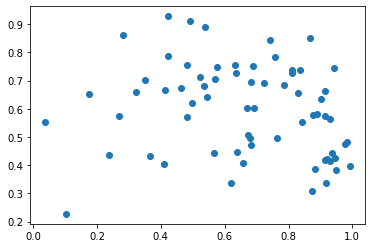

In [21]:
fig, ax = plt.subplots()
ax.scatter(x=df["energy"], y=df["danceability"])

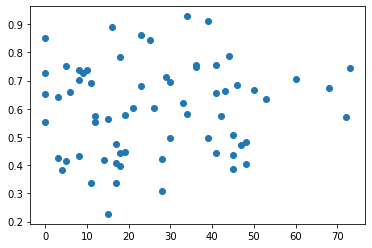

In [22]:
fig, ax = plt.subplots()
ax.scatter(x=df["track_popularity"], y=df["danceability"])

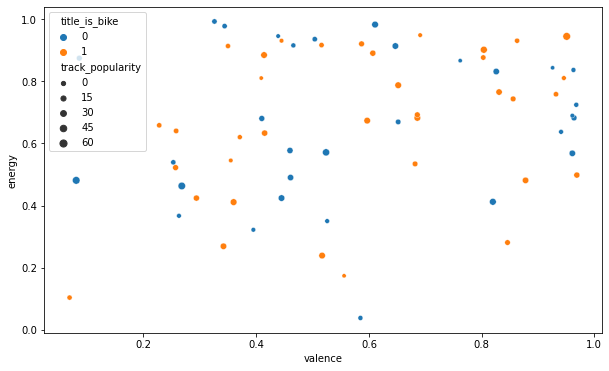

In [23]:
# are bike songs happy songs?
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df, y="energy", hue="title_is_bike", size="track_popularity", size_norm=(0,100), x="valence", ax=ax)
plt.show()

In [24]:
## most popular tracks
df[["Title", "Author", "Year", "artist_popularity","track_popularity", "valence", "energy", "danceability","duration_s"]].sort_values(by="track_popularity", ascending=False).head(10)

,Title,Author,Year,artist_popularity,track_popularity,valence,energy,danceability,duration_s
5,La Bicicleta,Carlos Vives & Shakira,2016,72.0,73.0,0.9510,0.944,0.745,229.510
90,Training Wheels,Melanie Martinez,2015,79.0,72.0,0.0807,0.481,0.571,205.680
25,Biking,Frank Ocean,2017,84.0,68.0,0.2680,0.463,0.673,277.521
48,Handlebars,Flobots,2005,43.0,60.0,0.5240,0.571,0.704,206.813
7,Bicycle,Chungha,2021,58.0,53.0,0.8040,0.901,0.634,179.156
27,Brand New Key,Melanie,1971,44.0,50.0,0.8200,0.412,0.667,144.867
80,Ten Speed (Of God’s Blood & Burial),Coheed and Cambria,2005,57.0,48.0,0.6110,0.982,0.481,226.680
19,Les Bicyclettes de Belsize,Engelbert Humperdinck,1968,59.0,48.0,0.3600,0.411,0.404,195.093
72,Rennrad,Dota,2016,43.0,47.0,0.6860,0.682,0.471,195.013
16,Bicycle Song,Red Hot Chili Peppers,2006,80.0,46.0,0.6520,0.787,0.685,203.533


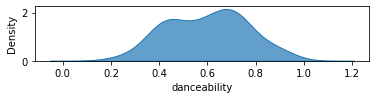

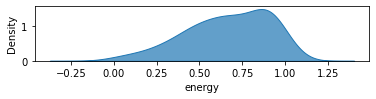

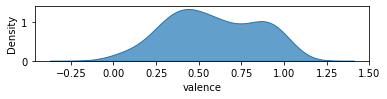

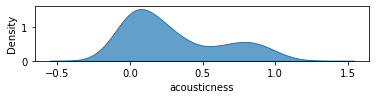

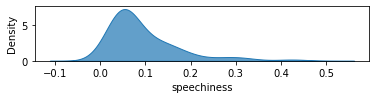

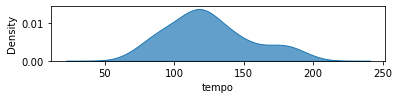

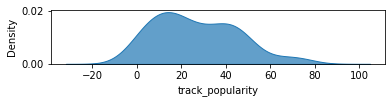

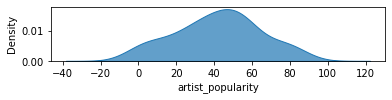

In [27]:
#for column in ['danceability','energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
 #      'instrumentalness', 'liveness', 'valence', 'tempo','duration_time', 'track_popularity', 'artist_popularity', 'artist_followers']:

for column in ['danceability','energy', 'valence',  'acousticness','speechiness',
        'tempo','track_popularity', 'artist_popularity', ]:
    fig, ax = plt.subplots(figsize=(6,1))
    sns.kdeplot(df[column], fill=True, alpha=0.7, ax=ax, cut=4)
    plt.show()
#print(sns.kdeplot(df['danceability'], fill=True, alpha=0.7, ax=ax))

### Long list

In [28]:
pivot = df_long[df_long["Year"]>=1950]
pivot = pivot.groupby("Year")["Title"].count().reset_index()

import numpy as np
helper = pd.DataFrame()
helper["Year"] = np.arange(1950,2023,1)
pivot = pd.merge(helper, pivot, how="outer", on="Year").fillna(0)
pivot

,Year,Title
0,1950.0,6.0
1,1951.0,2.0
2,1952.0,2.0
3,1953.0,0.0
4,1954.0,0.0
...,...,...
69,2019.0,32.0
70,2020.0,24.0
71,2021.0,19.0
72,2022.0,17.0


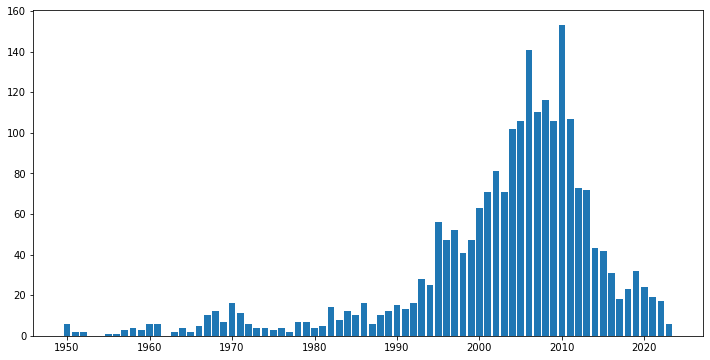

In [29]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(pivot["Year"], pivot["Title"])
plt.show()

# Playground

### Find track by name

In [56]:
i = 20
print(df_long["Title"][i].lower().replace(" ", "%"), " by:", df_long["Artist"][i])

girl%on%a%bike  by: Aardvarks


In [64]:
i = 135
print(df_long["Title"][i].lower(), " by:", df_long["Artist"][i])


query = "track:%An%meinem%Fahrrad%ist%alles%dran"
query = "track:%"+"Fool on a bicycle".replace(" ", "%")
query = df["Title"][i].lower().replace(" ", "%")
#query = "artist:Zuckowski"
print(query)

track = sp.search(query, limit=10, type='track', market=None)
#track["tracks"].items()
#track["tracks"]["items"][0]["artists"]
#track["tracks"]["items"][0]["name"]
for i, tracks in enumerate(track["tracks"].items()):
    print(track["tracks"]["items"][i]["artists"][0]["name"])

bicycle go! go!   by: Baku
bicycle%go!%go!%
Bombay Bicycle Club
I Am Drug
Queen
Bombay Bicycle Club
Queen
Bombay Bicycle Club
Tanger


In [ ]:
i = 1
print(df["Title"][i].lower(), " by:", df["Author"][i])
query = df["Title"][i].lower().replace(" ", "%")
print("----")

track = sp.search(query, limit=15, type='track', market=None)
#track["tracks"].items()
for i, tracks in enumerate(track["tracks"].items()):
    print(track["tracks"]["items"][i]["artists"][0]["name"])

track["tracks"]["items"][0]
print(track["tracks"]["items"][1]["id"])
print(track["tracks"]["items"][1]["external_urls"]["spotify"])
print(track["tracks"]["items"][1]["artists"][0]["name"])

#### Test

In [131]:
# get audio features
features = sp.audio_features(tracks=["24hKXgJKxKTYmooGzFytX5"])
features

[{'danceability': 0.563,
  'energy': 0.93,
  'key': 10,
  'loudness': -10.513,
  'mode': 0,
  'speechiness': 0.0371,
  'acousticness': 0.0324,
  'instrumentalness': 0.0293,
  'liveness': 0.316,
  'valence': 0.863,
  'tempo': 118.102,
  'type': 'audio_features',
  'id': '24hKXgJKxKTYmooGzFytX5',
  'uri': 'spotify:track:24hKXgJKxKTYmooGzFytX5',
  'track_href': 'https://api.spotify.com/v1/tracks/24hKXgJKxKTYmooGzFytX5',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/24hKXgJKxKTYmooGzFytX5',
  'duration_ms': 255400,
  'time_signature': 4}]

In [84]:
query = "track:%An%meinem%Fahrrad%ist%alles%dran"
#query = "artist:Zuckowski"

## Get data

In [ ]:
# Initialize a list to hold the data
data = []

# Loop through all the pages to extract text
for page_num in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[page_num]
    text = page.extract_text()
    
    # Split the text into lines
    lines = text.split('-')
    
    # Extract relevant data from lines and append to data list
    for line in lines:
        # Clean up the line
        line = line.strip()
        # Split the line into columns based on predefined structure
        if line:
            parts = line.split(' - ')
            if len(parts) >= 5:
                artist = parts[0].strip()
                title = parts[1].strip()
                source = parts[2].strip()
                label = parts[3].strip()
                origin_year = parts[4].strip()
                data.append([artist, title, source, label, origin_year])

# Close the PDF file
#pdf.close()

In [ ]:
page = pdf_reader.pages[0]
text = page.extract_text()

# Split the text into lines
lines = re.split(r"(\d{4})", text)
def combine_items_in_pairs(item_list):
    combined_pairs = []
    for i in range(0, len(item_list), 2):
        if i + 1 < len(item_list):
            combined_pairs.append(f"{item_list[i]} ++ {item_list[i + 1]}")
        else:
            combined_pairs.append(item_list[i])  # Handle odd number of items
    return combined_pairs

lines = combine_items_in_pairs(lines)
lines